In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
df = pd.read_csv(r'../data/comparison_all.csv')
df['pro_score'] = np.abs(df['pro_score'])
df['diff'] = df['fragility1']-df['fragility2']

In [47]:
df_top = df.sort_values('pro_score',ascending=True).head(5)

In [48]:
def GroupIt(df):
    fragility = np.hstack((df['fragility1'],df['fragility2']))
    EPI = np.hstack((df['EPI1'],df['EPI2']))
    FSI = np.hstack((df['FSI1'],df['FSI2']))
    group = np.hstack((['treated']*len(df['EPI1']), 
                  ['untreated']*len(df['EPI2'])))
    country = np.hstack((df['country1'],df['country1']))
    

    df_grouped = pd.DataFrame(data={
        'EPI':EPI,
        'FSI':FSI,
        'Group':group,
        'Fragility':fragility,
        'Country': country
    })
    return df_grouped

In [112]:

from matplotlib.colors import ListedColormap

pal = sns.color_palette("GnBu", 3)
cmap = ListedColormap(sns.color_palette("GnBu", 3).as_hex())
rcmap = ListedColormap(sns.color_palette("GnBu_r", 3).as_hex())

In [241]:
pal

[(0.79889273356401391, 0.92113802383698573, 0.77205690119184933),
 (0.47958477508650521, 0.79846212995001931, 0.76955017301038064),
 (0.16539792387543253, 0.5456978085351788, 0.74343713956170709)]

In [50]:
df_grouped = GroupIt(df)

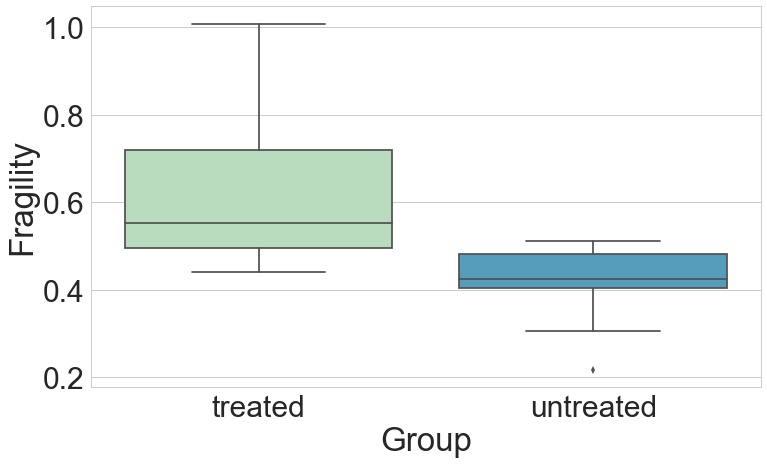

In [83]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid", font_scale=3)
ax = sns.boxplot(x="Group", y='Fragility', data=df_grouped, palette="GnBu")
plt.savefig('../Paper/figs/fragility_treat.pdf',bbox_inches='tight')
plt.show()

In [77]:
df_top = df.sort_values('pro_score',ascending=True).head(8)
df_top['fragility1'] = df_top['fragility2']
df_top['fragility2'] = df_top['diff']
df_top_grouped = GroupIt(df_top)

In [78]:
df_top_grouped

,Country,EPI,FSI,Fragility,Group
0,Iran2014,64.82,87.2,0.420020,treated
1,Ghana2008,54.66,64.6,0.217833,treated
2,India2013,53.74,77.5,0.378641,treated
3,Bhutan2012,61.84,82.4,0.447629,treated
4,Uzbekistan2015,64.88,85.3,0.407984,treated
5,Ecuador2009,68.08,81.2,0.447629,treated
6,Mali2007,38.32,75.5,0.506500,treated
7,Russia2016,83.52,81.0,0.512236,treated
8,Iran2014,63.33,79.2,0.215301,untreated
9,Ghana2008,76.46,67.4,0.469167,untreated


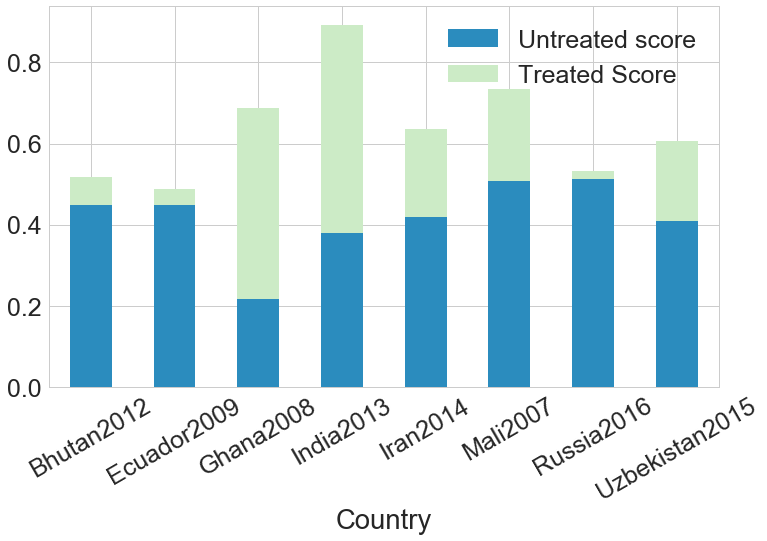

In [85]:
sns.set(style='whitegrid',font_scale=2.5)
df_top_grouped.pivot('Country','Group')['Fragility'].plot(figsize=(12,7),kind='bar',stacked='True', colormap=rcmap, rot=30)
plt.legend(['Untreated score','Treated Score'],fancybox=True, framealpha=1,shadow=True)
plt.savefig('../Paper/figs/compare_score.pdf',bbox_inches='tight')
plt.show()

In [80]:
pivoted = df_top_grouped.pivot('Country','Group')
pivoted.loc['Fragility','treated'] = df_top['diff']

In [89]:
df_frag = pd.read_csv('../Data/fragile.csv')
df_frag.head(3)

,Unnamed: 0,EPI,FSI,country,fragile
0,0,37.74,107.3,Afghanistan,0.966531
1,1,65.46,60.5,Albania,0.582212
2,2,57.18,76.8,Algeria,0.895586


In [105]:
markeredgewidth=2
markersize=12

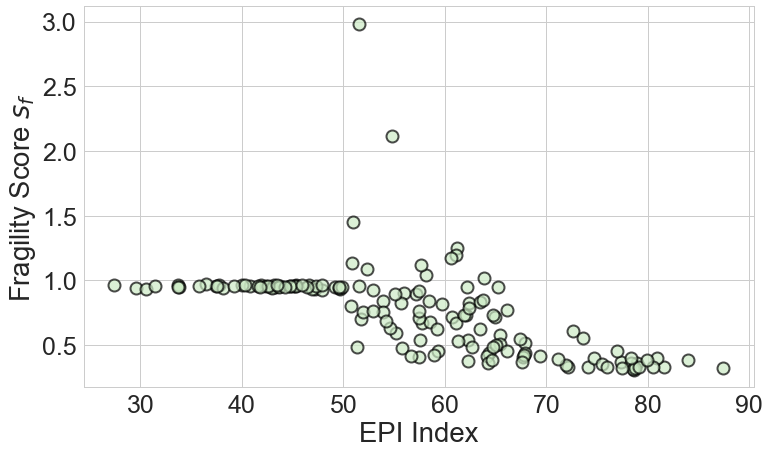

In [128]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['EPI'],df_frag['fragile'],'o',c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('EPI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('epifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epifs.pdf',bbox_inches='tight')
plt.show()

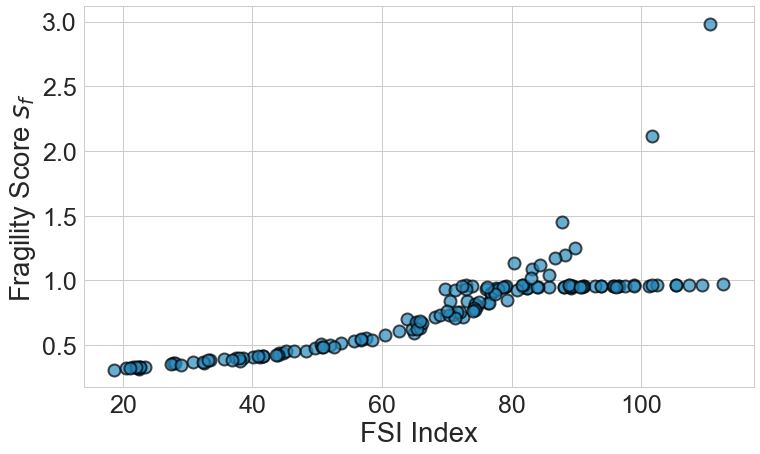

In [129]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['FSI'],df_frag['fragile'],'o', c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('FSI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('fsifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/fsifs.pdf',bbox_inches='tight')
plt.show()

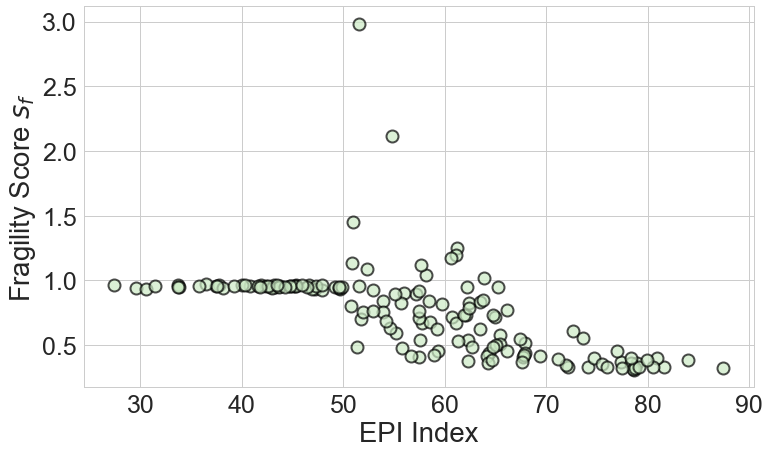

In [130]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['EPI'],df_frag['fragile'],'o',c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('EPI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('epifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epifs.pdf',bbox_inches='tight')
plt.show()

In [126]:
data=pd.read_csv('../Data/fragile.csv')
data.head(3)

,Unnamed: 0,EPI,FSI,country,fragile
0,0,37.74,107.3,Afghanistan,0.966531
1,1,65.46,60.5,Albania,0.582212
2,2,57.18,76.8,Algeria,0.895586


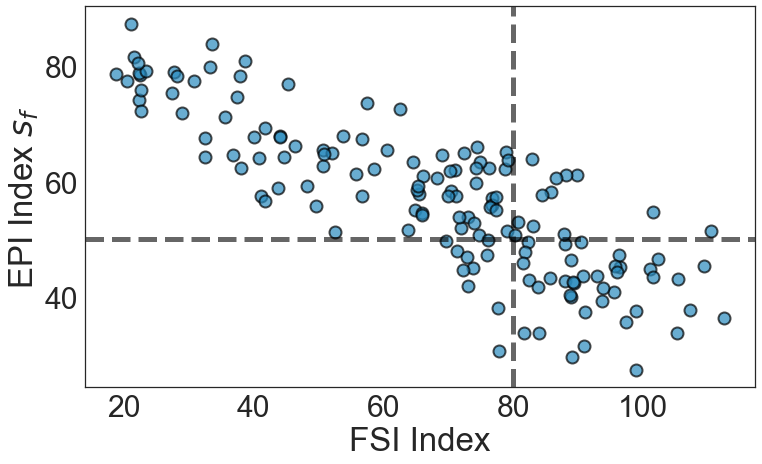

In [149]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.plot(data['FSI'],data['EPI'],'o', c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('FSI Index')
plt.ylabel(r'EPI Index $s_f$')
plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.savefig('fsifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/fsiepi.pdf',bbox_inches='tight')
plt.show()

In [204]:
epi_future = pd.read_csv('../Code/EPI_future.csv')
tradeoff = pd.read_csv('../Code/tradeoff.csv')
gdp_growth_future = pd.read_csv('../Code/gdp_growth_future.csv')

In [205]:
years = epi_future['years']

In [232]:
markersize=10
linewidth=4
alpha=0.8

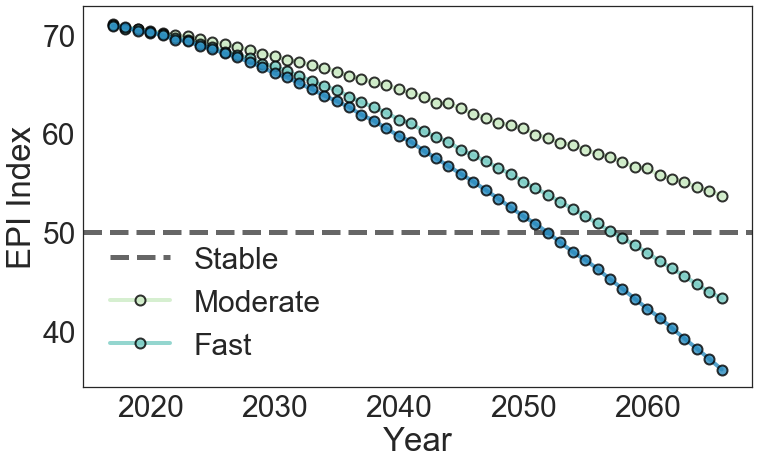

In [233]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.plot(years,epi_future['0.0'],'o-',linewidth=linewidth, c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,epi_future['0.3'],'o-',linewidth=linewidth, c=pal[1],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,epi_future['0.5'],'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)

plt.xlabel('Year')
plt.ylabel(r'EPI Index')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.legend(['Stable','Moderate','Fast'])

plt.savefig('epi_future.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epi_future.pdf',bbox_inches='tight')
plt.show()

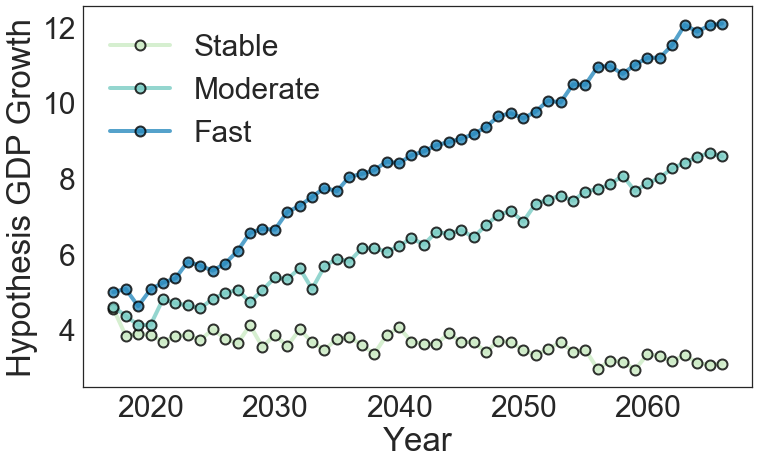

In [234]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.plot(years,gdp_growth_future['0.0'],'o-',linewidth=linewidth, c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,gdp_growth_future['0.3'],'o-',linewidth=linewidth, c=pal[1],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,gdp_growth_future['0.5'],'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)

plt.xlabel('Year')
plt.ylabel(r'Hypothesis GDP Growth')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.legend(['Stable','Moderate','Fast'])

plt.savefig('gdp_growth_future.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/gdp_growth_future.pdf',bbox_inches='tight')
plt.show()

In [235]:
betas = [float(x) for x in tradeoff.columns]
alphas = [float(x) for x in tradeoff.index]

In [237]:
alphas_min = []
betas_success = []
success=False
for b in betas:
    tuned = tradeoff[str(b)]
    for i,x in enumerate(tuned):
        if x >= 51:
            alphas_min.append(i)
            success=True
            break
    if success:
        betas_success.append(b)
        success=False

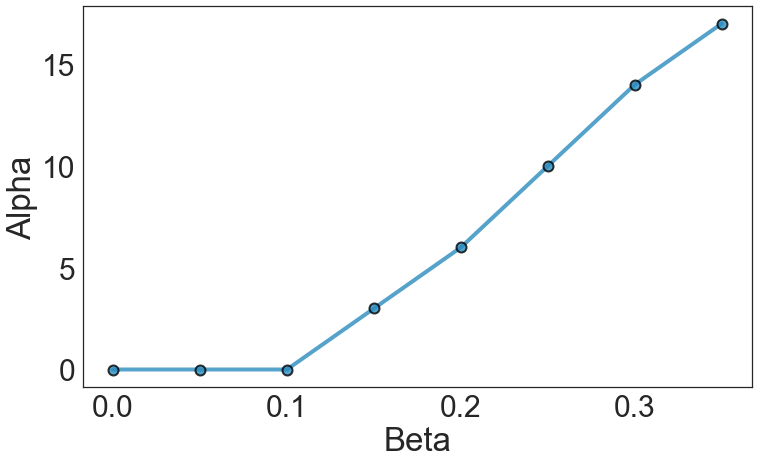

In [240]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)

plt.plot(betas_success, alphas_min,'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)

plt.xlabel('Beta')
plt.ylabel(r'Alpha')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

#plt.legend(['Stable','Moderate','Fast'])

plt.savefig('tradeoff.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/tradeoff.pdf',bbox_inches='tight')
plt.show()